### <b><i>Loading the Libraries

In [ ]:
import pandas as pd #Used for data manipulation
import numpy as np #Used for numerical computations
import matplotlib.pyplot as plt #Used for data visualization
import seaborn as sns #Used for data visualization
from textblob import TextBlob #Used for sentiment analysis
import re #Used for regular expressions
import scipy.sparse as sp #Used for sparse matrices
from sklearn.model_logistic_selection import train_test_split #Used for splitting the data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer #Used for converting text data into vectors
from sklearn.multioutput import MultiOutputClassifier #Used for multi-output classification
from sklearn.preprocessing import LabelEncoder #Used for encoding labels
from sklearn.linear_model_logistic import LogisticRegression #Used for logistic regression
from sklearn.metrics import classification_report, accuracy_score #Used for evaluating the model_logistic
from sklearn.metrics import confusion_matrix #Used for evaluating the model_logistic
from nltk.corpus import stopwords #Used for removing stopwords
from nltk.tokenize import word_tokenize #Used for tokenizing text
from nltk.stem import WordNetLemmatizer #Used for lemmatizing text
import nltk #Used for natural language processing
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


### <b><i>Loading the Dataset  

In [ ]:
data = pd.read_csv('/home/divyansh/Desktop/ok/archive (2)/BigBasket Products.csv')
data.head() 

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


### <b><i>Checking for the missing values

In [ ]:
data.isna().sum()    #checking for missing values

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

### <b><i>Getting the info about the Dataset


In [4]:
data.info()    #checking for data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


                   Category  Count
0          Beauty & Hygiene   7867
1      Gourmet & World Food   4690
2    Kitchen, Garden & Pets   3580
3    Snacks & Branded Foods   2814
4  Foodgrains, Oil & Masala   2676


/tmp/ipykernel_22242/1666681863.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Category', data=category_count_df, palette='viridis')


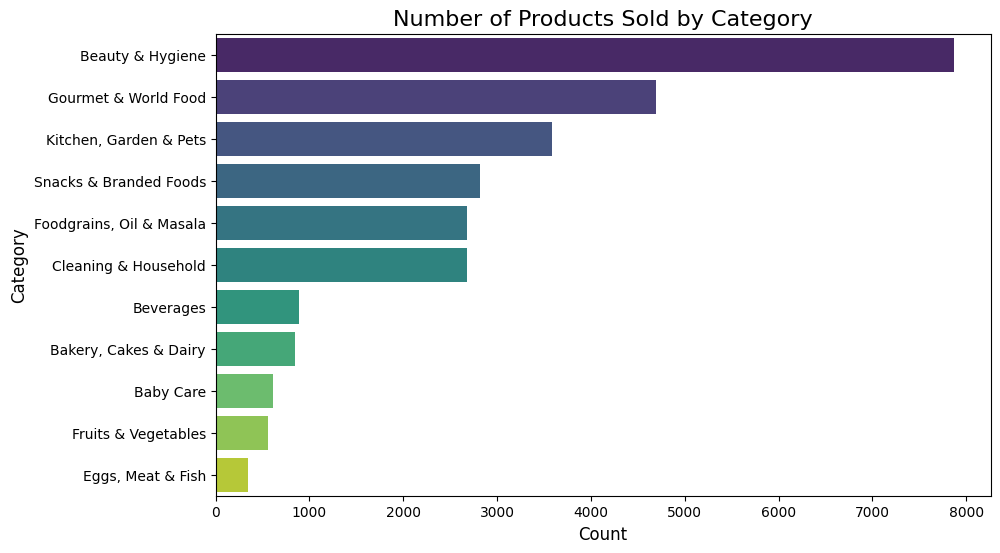

In [ ]:
# Counting the number of products in each category
category_count = data['category'].value_counts()
category_count_df = category_count.reset_index()
category_count_df.columns = ['Category', 'Count']
# Display the top categories
print(category_count_df.head())
# Plot the distribution of categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Category', data=category_count_df, palette='viridis')
plt.title("Number of Products Sold by Category", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()

### <b><i>Checking How Many unique Categories we have 

In [6]:
unique_categories = data['category'].unique()
print(f"Unique categories ({len(unique_categories)}): {unique_categories}")

Unique categories (11): ['Beauty & Hygiene' 'Kitchen, Garden & Pets' 'Cleaning & Household'
 'Gourmet & World Food' 'Foodgrains, Oil & Masala'
 'Snacks & Branded Foods' 'Beverages' 'Bakery, Cakes & Dairy' 'Baby Care'
 'Fruits & Vegetables' 'Eggs, Meat & Fish']


### <b><i>Top 20 brands accprding to sales in a particular category 

Top 20 Brands by Average Rating in Foodgrains, Oil & Masala Category:
                 brand  Avg_Rating  Product_Count
15               Annai    5.000000              1
153              Orino    5.000000              1
147              Ogara    5.000000              1
187                Skc    5.000000              1
215           Trucrose    5.000000              2
36         DIVING DUCK    5.000000              1
186          Satyendra    4.900000              1
119          Merit Vco    4.700000              1
213          Tree Grab    4.500000              1
107           Live Yum    4.500000              1
93     Kapiva Ayurveda    4.500000              2
27        Cambay Tiger    4.471705              2
227    Wingreens Farms    4.466667              3
7    Aashirvaad Svasti    4.450000              4
45               Draft    4.400000              2
176                SSK    4.400000              2
89              Jharna    4.400000              1
162           Pavizham    4.40

/tmp/ipykernel_22242/573033844.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


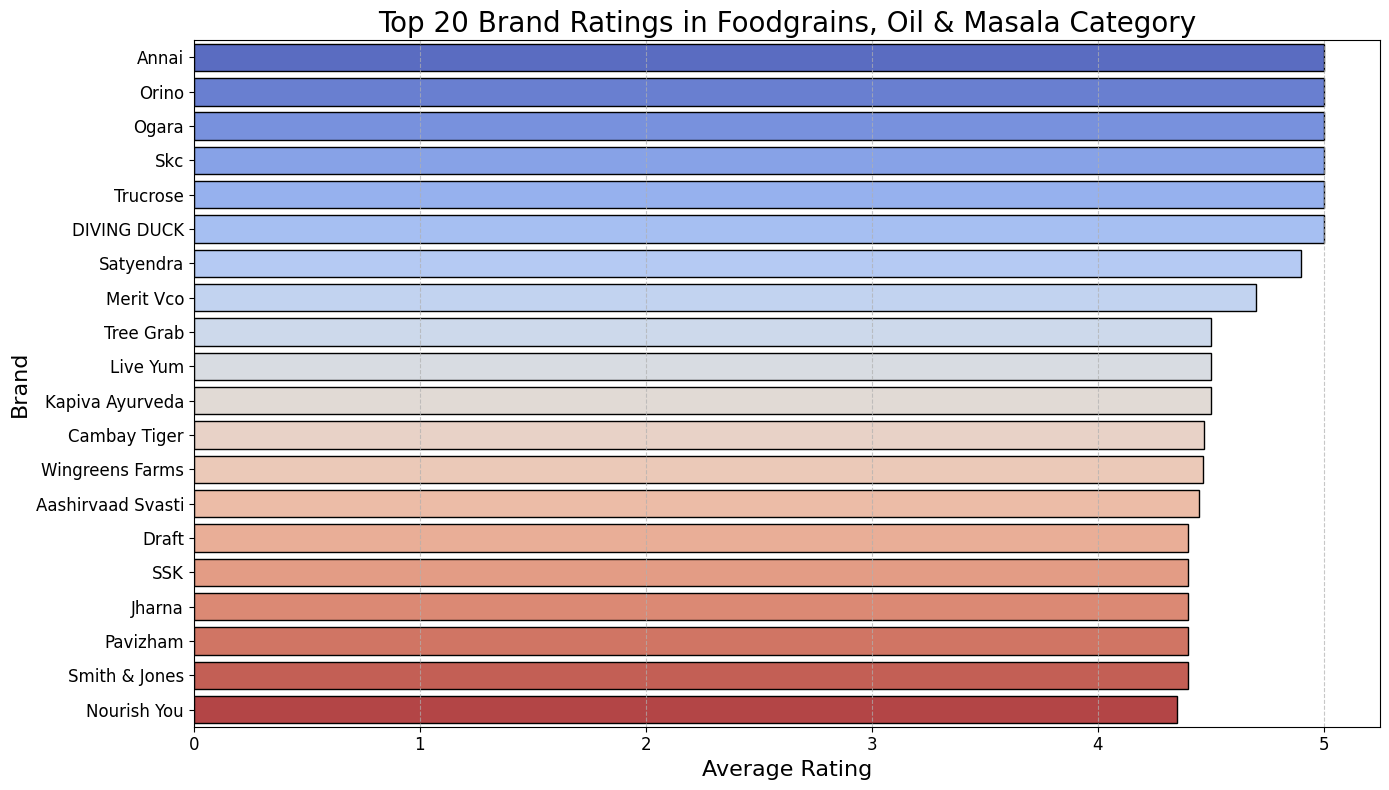

In [ ]:
# Handle missing values
data['rating'] = data['rating'].fillna(data['rating'].mean())  # Fill missing ratings with median
data = data.dropna(subset=['brand', 'category', 'rating'])  # Ensure no critical missing values
# Select a specific category
selected_category = "Foodgrains, Oil & Masala"  #Select the categories we want to analyze
filtered_data = data[data['category'] == selected_category]

# Group by brand and calculate metrics
brand_analysis = filtered_data.groupby('brand').agg(
    Avg_Rating=('rating', 'mean'),
    Product_Count=('index', 'count')
).reset_index()
# Sort by average rating and select the top 20
brand_analysis = brand_analysis.sort_values(by='Avg_Rating', ascending=False).head(20)
# Display the top 20 brands
print("Top 20 Brands by Average Rating in", selected_category, "Category:")
print(brand_analysis)
# Plot the ratings of the top 10 brands
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Avg_Rating', y='brand', data=brand_analysis,
    palette='coolwarm', edgecolor="black", linewidth=1)
plt.title(f"Top 20 Brand Ratings in {selected_category} Category", fontsize=20)
plt.xlabel("Average Rating", fontsize=16)
plt.ylabel("Brand", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### <b><i>Total Sales by Top 20 sub-category 

Top 5 Sub-Categories by Sales:
            sub_category  Total_Sales
80             Skin Care    945402.38
41     Fragrances & Deos    893099.59
22    Crockery & Cutlery    465284.00
21  Cookware & Non Stick    426523.90
50     Health & Medicine    414334.12


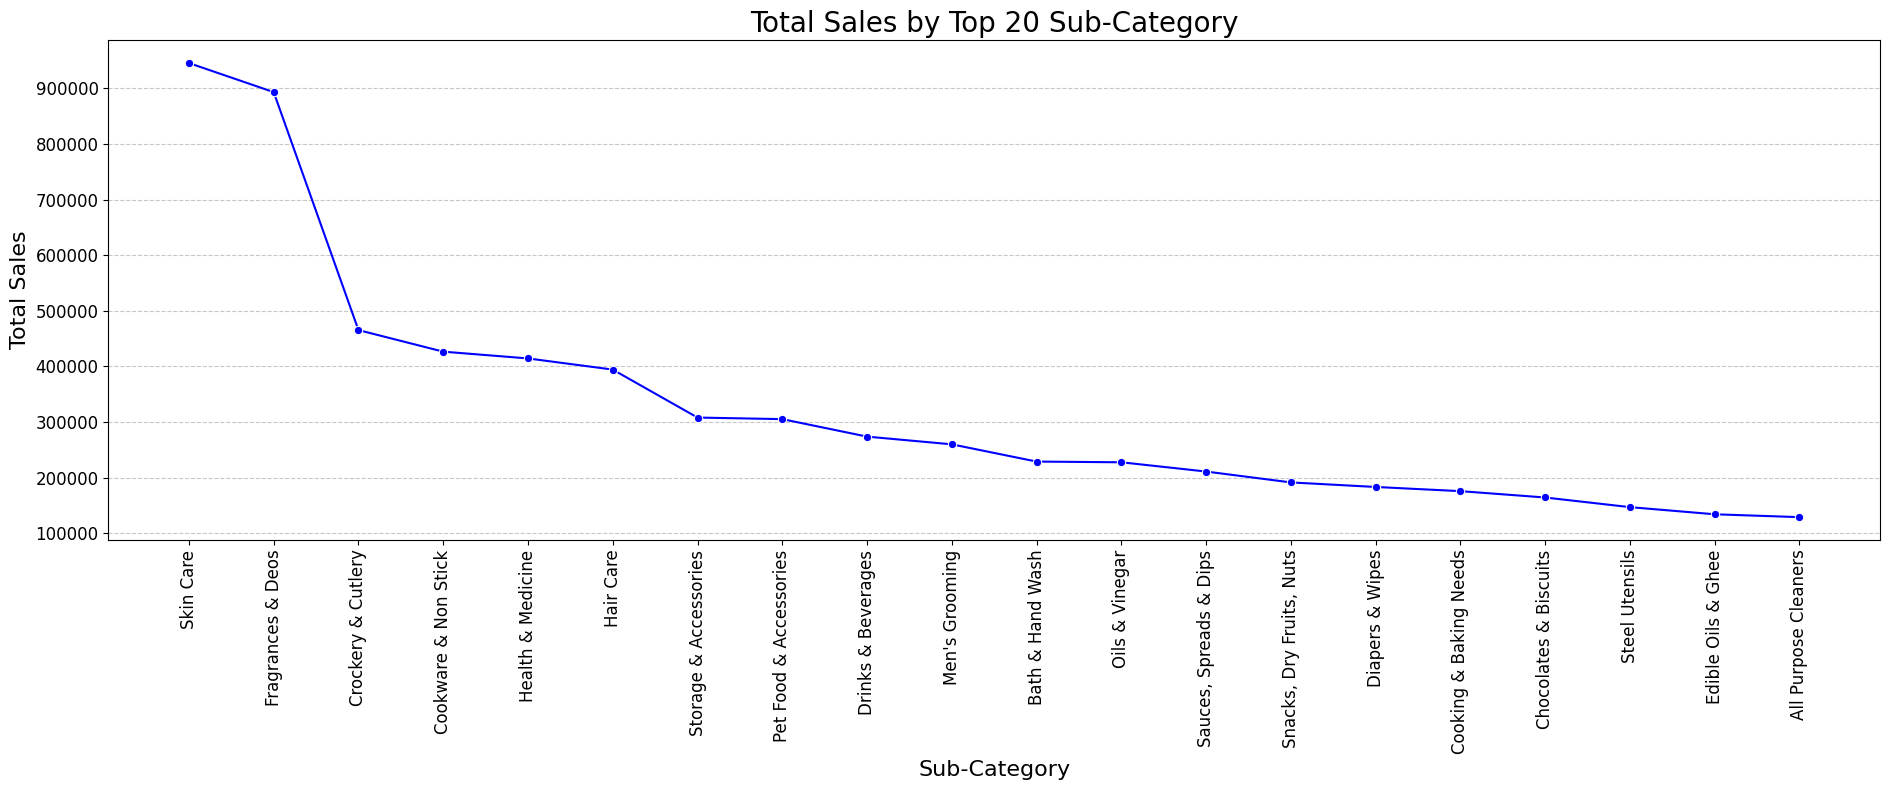

In [ ]:
# Handle missing values
data['sale_price'] = data['sale_price'].fillna(0)  # Replace missing sales with 0
data = data.dropna(subset=['sub_category'])  # Ensure no missing sub-categories

# Group by sub-category and calculate total sales
sub_category_sales = data.groupby('sub_category').agg(
    Total_Sales=('sale_price', 'sum')
).reset_index()
# Sort by total sales
sub_category_sales = sub_category_sales.sort_values(by='Total_Sales', ascending=False)
# Display the top 5 sub-categories by sales
print("Top 5 Sub-Categories by Sales:")
print(sub_category_sales.head())
# Plot a line chart for total sales by sub-category
plt.figure(figsize=(19, 8))
sns.lineplot(
    data=sub_category_sales[:20],
    x='sub_category', y='Total_Sales', marker='o', sort=False, color='blue'
)
plt.title("Total Sales by Top 20 Sub-Category", fontsize=20)
plt.xlabel("Sub-Category", fontsize=16)
plt.ylabel("Total Sales", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### <b><i>Revenue Share in Sales by Category

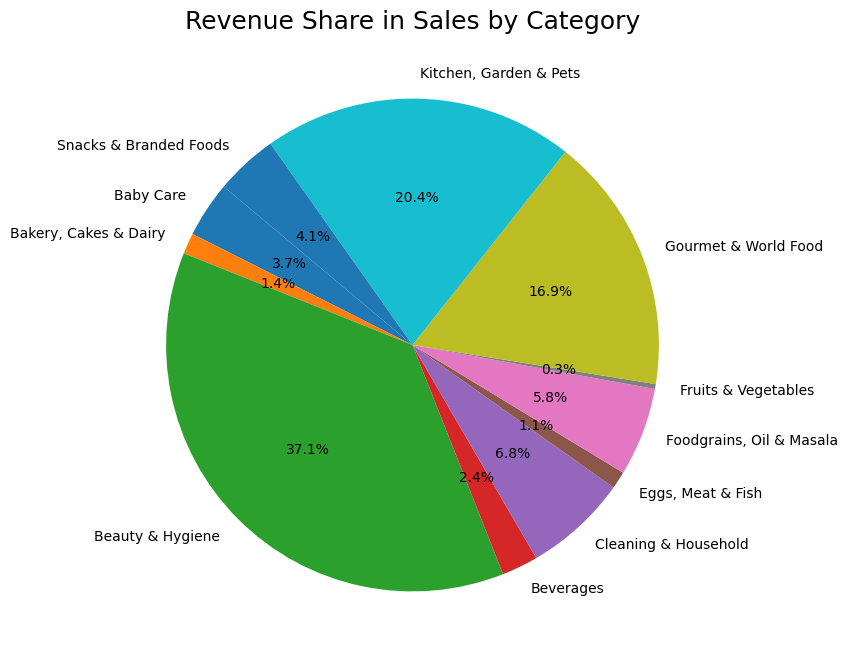

In [ ]:
# Calculate total sales per category
category_sales = data.groupby('category').agg(
    Total_Sales=('sale_price', 'sum')
).reset_index()
plt.figure(figsize=(10, 8))
plt.pie(category_sales['Total_Sales'], labels=category_sales['category'], autopct='%1.1f%%', startangle=140)
plt.title("Revenue Share in Sales by Category", fontsize=18)
plt.show()

In [10]:
data.tail()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."
27554,27555,United Dreams Go Far Deodorant,Beauty & Hygiene,Men's Grooming,United Colors Of Benetton,214.53,390.0,Men's Deodorants,4.5,The new mens fragrance from the United Dreams ...


### <b><i>Now we will make a Machine Learning model_logistic which will be trained on the description in the dataset and we will predict the category and sub_category according to that product

### <b><i>Cleaning the Description column in the dataset

In [ ]:
sample_data = data['description'].dropna()  # Fill missing values with empty string
# Define the cleaning function
def clean_description(text):
    # Convert to lowercase
    text = text.lower()
    #To Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    #To Tokenize text
    words = word_tokenize(text)
    #To Load stopwords
    stop_words = set(stopwords.words('english'))
    #To Lemmatizer
    lemmatizer = WordNetLemmatizer()
    #To Remove stopwords and lemmatize
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
    #To Reconstruct cleaned description
    return ' '.join(cleaned_words)

# Create a DataFrame for the sample data
df_sample = pd.DataFrame({'Description': sample_data})
# Apply the cleaning function to the sample data
df_sample['Cleaned_Description'] = df_sample['Description'].apply(clean_description)
# Display the original and cleaned descriptions
print(df_sample['Cleaned_Description'][0])

product contains garlic oil known help proper digestion maintain proper cholesterol level support cardiovascular also build immunity beauty tip trick visit


### <b><i>Encoding the Target variables using the label encoder

In [12]:
data = data.dropna(subset=['description', 'category', 'sub_category', 'type'])
# Label Encoding for category and sub_category
label_encoder_category = LabelEncoder()
label_encoder_sub_category = LabelEncoder()

data['encoded_category'] = label_encoder_category.fit_transform(data['category'])
data['encoded_sub_category'] = label_encoder_sub_category.fit_transform(data['sub_category'])

### <b><i> Converting the cleaned dataset into vectors to train the dataset

In [13]:
# Convert Text Descriptions to TF-IDF Features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_sample['Cleaned_Description'])

# Prepare Features (X) and Target Labels (y)
y = data[['encoded_category', 'encoded_sub_category']]  # Multi-output labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Build Multi-Output model_logistic using Logistic Regression
# Use MultiOutputClassifier to handle multi-label classification
model_logistic = MultiOutputClassifier(LogisticRegression(max_iter=800, C=0.2))

# Train the model_logistic
model_logistic.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=800))

### <b><i> After Training the the model_logistic we will now predict the output and will evaluate the model_logistic

In [14]:
y_pred = model_logistic.predict(X_test) #Evaluate the model_logistic

# Evaluate the performance
print("Accuracy for Category and Sub-category prediction:")
print("Accuracy for Category:", round(accuracy_score(y_test['encoded_category'], y_pred[:, 0]),2))
print("Accuracy for Sub-category:", round(accuracy_score(y_test['encoded_sub_category'], y_pred[:, 1]),2))

# Print classification reports
print("\nClassification Report for Category:")
print(classification_report(y_test['encoded_category'], y_pred[:, 0]))

print("\nClassification Report for Sub-category:")
print(classification_report(y_test['encoded_sub_category'], y_pred[:, 1]))

# predict for new data (example):
new_description = "Fresh organic spices for cooking as they are natural and are grown organically"
new_description_processed = clean_description(new_description)
new_description_tfidf = vectorizer.transform([new_description_processed])

# Predict category and sub-category for the new description
predicted_category = model_logistic.predict(new_description_tfidf)[0][0]
predicted_sub_category = model_logistic.predict(new_description_tfidf)[0][1]

# # Convert encoded labels back to original values
predicted_category_label = label_encoder_category.inverse_transform([predicted_category])[0]
predicted_sub_category_label = label_encoder_sub_category.inverse_transform([predicted_sub_category])[0]

print("\nPredicted Category:", predicted_category_label)
print("Predicted Sub-category:", predicted_sub_category_label)

Accuracy for Category and Sub-category prediction:
Accuracy for Category: 0.88
Accuracy for Sub-category: 0.77

Classification Report for Category:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       147
           1       0.90      0.59      0.72       271
           2       0.95      0.98      0.96      2320
           3       0.80      0.67      0.73       253
           4       0.94      0.93      0.94       803
           5       0.95      0.69      0.80       101
           6       0.85      0.81      0.83       825
           7       1.00      0.89      0.94       161
           8       0.74      0.87      0.80      1374
           9       0.96      0.94      0.95      1106
          10       0.80      0.76      0.78       871

    accuracy                           0.88      8232
   macro avg       0.89      0.81      0.84      8232
weighted avg       0.88      0.88      0.88      8232


Classification Report for Sub-category

/home/divyansh/Desktop/ok/myenv1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/divyansh/Desktop/ok/myenv1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/divyansh/Desktop/ok/myenv1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i